# Numerical derivative "a la seesaw"

We have a **periodic** function discretized over a grid with N **odd** points:
\begin{equation}
\begin{split}
& f_i = f(x_i), \quad i \in [1...N].
\end{split}
\end{equation}
We want the derivative of the function at those points in such a way that
\begin{equation}
f_i + f'_i \frac{\Delta x}{2} = f_{i+1} - f'_{i+1} \frac{\Delta x}{2}.
\end{equation}
The derivatives at two neighboring points must give the correct linear continuation of the function.
This method is called "a la seesaw" because every segment of the function is a seesaw connected to the next one.
We need to find the inclinations (derivative) of all seesaw such that the function is continous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# grid definition
xmin, xmax = -3, 3
N = 51
grid, delta = np.linspace(xmin, xmax, N, endpoint=False, retstep=True)
# grid=grid+delta/2

In [3]:
# sample functions
f1 = 0.5*np.cos(2*2*np.pi*grid/(xmax-xmin))
f2 = grid**2 + 2.0
f3 = np.abs(np.arctan(grid))

We have to solve the linear system
\begin{equation}
\begin{split}
A f' &= B \\
A &=
\begin{bmatrix}
1 & 0 & 0 & ... & 0 & 1 \\
1 & 1 & 0 & ... & 0 & 0 \\
0 & 1 & 1 & ... & 0 & 0 \\
... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & ... & 1 & 1 \\
\end{bmatrix} \\
B &=
\begin{bmatrix}
C_{1N} \\
C_{21} \\
C_{32} \\
... \\
C_{NN-1} \\
\end{bmatrix},
\quad C_{ij} = \frac{2(f_i - f_j)}{\Delta x}
\end{split}
\end{equation}

NOTE: as mentioned above, we can see that for N = even, the A matrix is singular.

In [4]:
# define A and Bs
A = np.zeros((N,N))
for i in range(N):
    A[i,i] = 1
    A[i,i-1] = 1
B1 = 2 * (f1-np.roll(f1,1)) / delta
B2 = 2 * (f2-np.roll(f2,1)) / delta
B3 = 2 * (f3-np.roll(f3,1)) / delta

In [5]:
# solve for f prime
f1p = np.linalg.solve(A,B1)
f2p = np.linalg.solve(A,B2)
f3p = np.linalg.solve(A,B3)

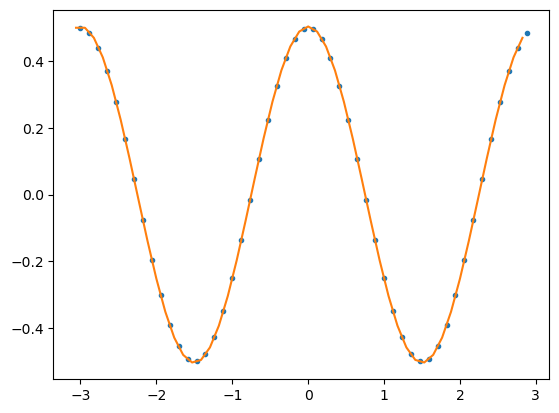

In [6]:
# plot the first function
plt.plot(grid, f1, '.')
plt.plot(grid - delta/2, f1 - f1p*delta/2)
plt.show()

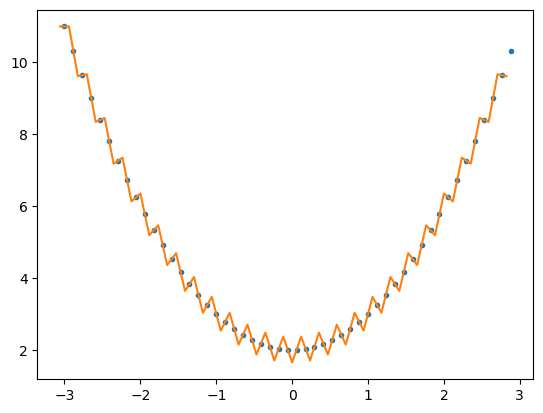

In [7]:
# plot the second function
plt.plot(grid, f2, '.')
plt.plot(grid - delta/2, f2 - f2p*delta/2)
plt.show()

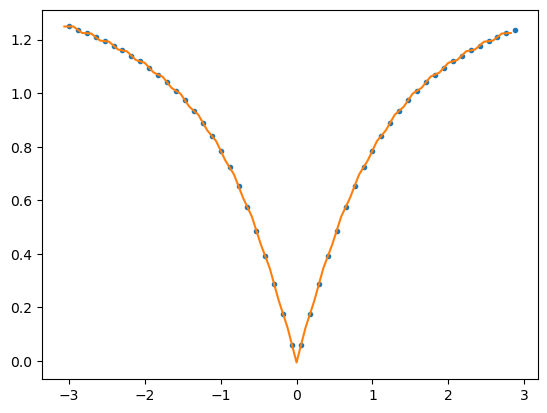

In [8]:
# plot the first function
plt.plot(grid, f3, '.')
plt.plot(grid - delta/2, f3 - f3p*delta/2)
plt.show()